In [2]:
from optimization import barrier_method_lasso
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sp

In [3]:
A = np.array([[1.0, 2.0], [2.0, 7.0]])
b = np.array([-1.0, 10.0]).reshape(-1, 1)
x_0 = np.array([1.3, 1.3])
u_0 = np.array([5.0, 5.0])
x, msg, history = barrier_method_lasso(A, b, reg_coef=1e-2, x_0=x_0, u_0=u_0, trace=True)

In [4]:
history

defaultdict(list,
            {'func': [3.9841028034641814,
              0.44209402794071206,
              0.15130384967166893,
              0.13151827558005194,
              0.12970018280897916,
              0.1295200018281239,
              0.12950200001828124],
             'time': [0.003999948501586914,
              0.005506038665771484,
              0.006513118743896484,
              0.008512258529663086,
              0.009017467498779297,
              0.01102304458618164,
              0.01202845573425293],
             'duality_gap': [0.12517421543210402,
              0.0876248362923226,
              0.018204923471547244,
              0.001981827282107551,
              0.00019981823566334045,
              1.9998182314268087e-05,
              1.999981799172268e-06]})

Первый эксперимент. Проверим, насколько метод чувствителен к выбору параметра $\gamma$ и $\epsilon_{inner}$. 
Сгенерируем тестовые данные,

In [89]:
np.random.seed(1337)
A = 10 * np.random.rand(10000, 1000)
b = np.random.rand(10000).reshape(-1, 1)
x_0 = np.zeros(1000)
u_0 = np.ones(1000)

In [90]:
result_array_time = []
result_array_iter = []
gammas = [5, 10, 20, 25, 40, 50, 75, 100]
for gamma in gammas:
    _, _, history = barrier_method_lasso(A, b, reg_coef=1e-3, x_0=x_0, u_0=u_0, trace=True, gamma=gamma)
    result_array_time.append((history['duality_gap'], history['time']))
    result_array_iter.append((history['duality_gap'], np.arange(0, len(history['duality_gap']))))

[Text(0.5, 0, 'Number of iterations'), Text(0, 0.5, '$log_{10}(Gap)$')]

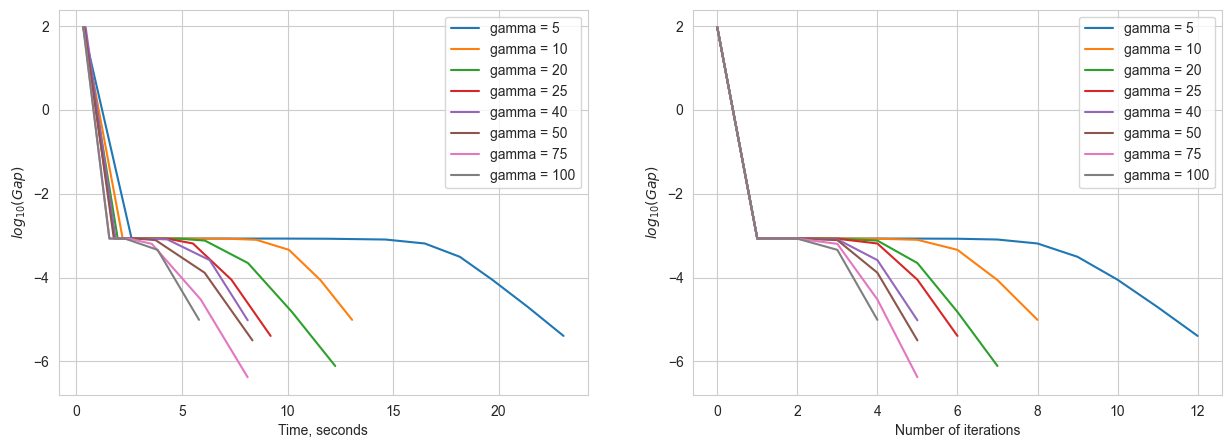

In [91]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i, values in enumerate(result_array_iter):
    gap, time = values
    axis[1].plot(time, np.log10(gap), label=f'gamma = {gammas[i]}')
for i, values in enumerate(result_array_time):
    gap, time = values
    axis[0].plot(time, np.log10(gap) , label=f'gamma = {gammas[i]}') 
axis[0].legend()
axis[1].legend()
axis[0].set(xlabel="Time, seconds", ylabel="$log_{10}(Gap)$")
axis[1].set(xlabel="Number of iterations", ylabel="$log_{10}(Gap)$")

In [92]:
result_array_time = []
result_array_iter = []
epses = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
for eps in epses:
    _, _, history = barrier_method_lasso(A, b, reg_coef=1e-3, x_0=x_0, u_0=u_0, trace=True, tolerance_inner=eps)
    result_array_time.append((history['duality_gap'], history['time']))
    result_array_iter.append((history['duality_gap'], np.arange(0, len(history['duality_gap']))))

<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:7: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:7: SyntaxWarning: invalid escape sequence '\e'
C:\Users\kudre\AppData\Local\Temp\ipykernel_5548\208252763.py:4: SyntaxWarning: invalid escape sequence '\e'
  axis[1].plot(time, np.log10(gap), label="$\epsilon_{inner} = " + f"{epses[i]}$")
C:\Users\kudre\AppData\Local\Temp\ipykernel_5548\208252763.py:7: SyntaxWarning: invalid escape sequence '\e'
  axis[0].plot(time, np.log10(gap) , label="$\epsilon_{inner} = " + f"{epses[i]}$")


[Text(0.5, 0, 'Number of iterations'), Text(0, 0.5, '$log_{10}(Gap)$')]

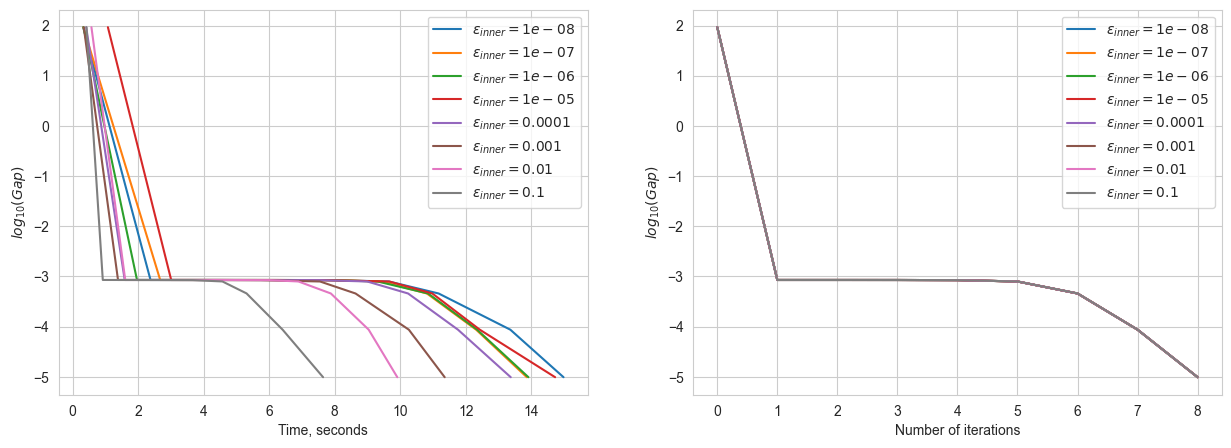

In [93]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i, values in enumerate(result_array_iter):
    gap, time = values
    axis[1].plot(time, np.log10(gap), label="$\epsilon_{inner} = " + f"{epses[i]}$")
for i, values in enumerate(result_array_time):
    gap, time = values
    axis[0].plot(time, np.log10(gap) , label="$\epsilon_{inner} = " + f"{epses[i]}$") 
axis[0].legend()
axis[1].legend()
axis[0].set(xlabel="Time, seconds", ylabel="$log_{10}(Gap)$")
axis[1].set(xlabel="Number of iterations", ylabel="$log_{10}(Gap)$")

Теперь посмотрим, насколько меняется поведение метода при изменении размерности пространства $n$, размера выборки $m$ и коэффициента регуляризации $\lambda$

In [83]:
result_array_time = []
result_array_iter = []
n_sizes = [2, 4, 8, 16, 32, 64, 128, 256]
for n in n_sizes:
    A = 10 * np.random.rand(10000, n)
    b = np.random.rand(10000).reshape(-1, 1)
    x_0 = np.zeros(n)
    u_0 = np.ones(n)
    _, _, history = barrier_method_lasso(A, b, reg_coef=1e-3, x_0=x_0, u_0=u_0, trace=True)
    result_array_time.append((history['duality_gap'], history['time']))
    result_array_iter.append((history['duality_gap'], np.arange(0, len(history['duality_gap']))))

[Text(0.5, 0, 'Number of iterations'), Text(0, 0.5, '$log_{10}(Gap)$')]

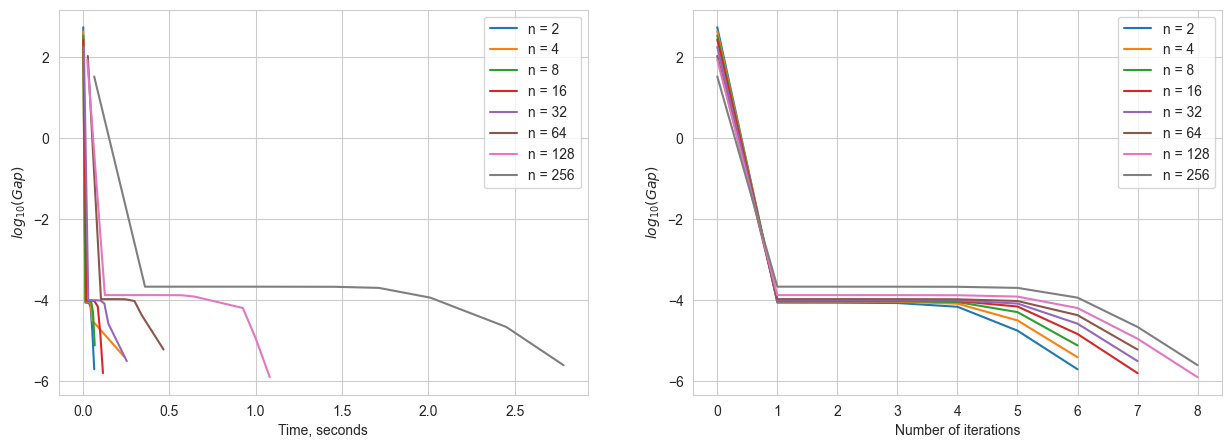

In [84]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i, values in enumerate(result_array_iter):
    gap, time = values
    axis[1].plot(time, np.log10(gap), label = f"n = {n_sizes[i]}")
for i, values in enumerate(result_array_time):
    gap, time = values
    axis[0].plot(time, np.log10(gap) , label = f"n = {n_sizes[i]}") 
axis[0].legend()
axis[1].legend()
axis[0].set(xlabel="Time, seconds", ylabel="$log_{10}(Gap)$")
axis[1].set(xlabel="Number of iterations", ylabel="$log_{10}(Gap)$")

In [85]:
result_array_time = []
result_array_iter = []
m_sizes = [100, 1000, 5000, 10000, 2000, 50000, 100000]
for m in m_sizes:
    A = 10 * np.random.rand(m, 1000)
    b = np.random.rand(m).reshape(-1, 1)
    x_0 = np.zeros(1000)
    u_0 = np.ones(1000)
    _, _, history = barrier_method_lasso(A, b, reg_coef=1e-3, x_0=x_0, u_0=u_0, trace=True)
    result_array_time.append((history['duality_gap'], history['time']))
    result_array_iter.append((history['duality_gap'], np.arange(0, len(history['duality_gap']))))

[Text(0.5, 0, 'Number of iterations'), Text(0, 0.5, '$log_{10}(Gap)$')]

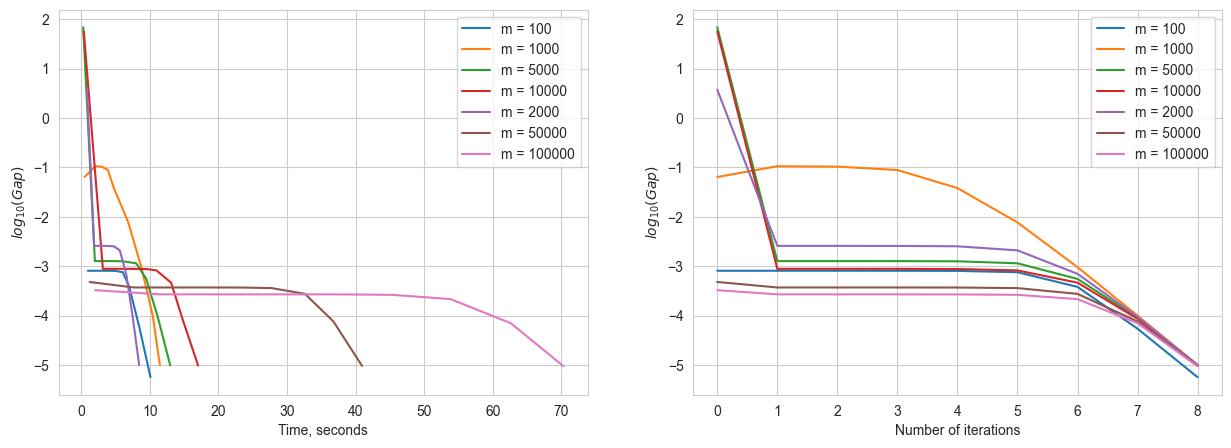

In [86]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i, values in enumerate(result_array_iter):
    gap, time = values
    axis[1].plot(time, np.log10(gap), label = f"m = {m_sizes[i]}")
for i, values in enumerate(result_array_time):
    gap, time = values
    axis[0].plot(time, np.log10(gap) , label = f"m = {m_sizes[i]}") 
axis[0].legend()
axis[1].legend()
axis[0].set(xlabel="Time, seconds", ylabel="$log_{10}(Gap)$")
axis[1].set(xlabel="Number of iterations", ylabel="$log_{10}(Gap)$")

In [87]:
result_array_time = []
result_array_iter = []
A = 10 * np.random.rand(10000, 1000)
b = np.random.rand(10000).reshape(-1, 1)
x_0 = np.zeros(1000)
u_0 = np.ones(1000)
reg_coeffs = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
for reg_coeff in reg_coeffs:
    _, _, history = barrier_method_lasso(A, b, reg_coef=reg_coeff, x_0=x_0, u_0=u_0, trace=True)
    result_array_time.append((history['duality_gap'], history['time']))
    result_array_iter.append((history['duality_gap'], np.arange(0, len(history['duality_gap']))))

<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
C:\Users\kudre\AppData\Local\Temp\ipykernel_5548\3139651184.py:4: SyntaxWarning: invalid escape sequence '\l'
  axis[1].plot(time, np.log10(gap), label=f"$\lambda$ = {reg_coeffs[i]}")
C:\Users\kudre\AppData\Local\Temp\ipykernel_5548\3139651184.py:7: SyntaxWarning: invalid escape sequence '\l'
  axis[0].plot(time, np.log10(gap) , label=f"$\lambda$ = {reg_coeffs[i]}")


[Text(0.5, 0, 'Number of iterations'), Text(0, 0.5, '$log_{10}(Gap)$')]

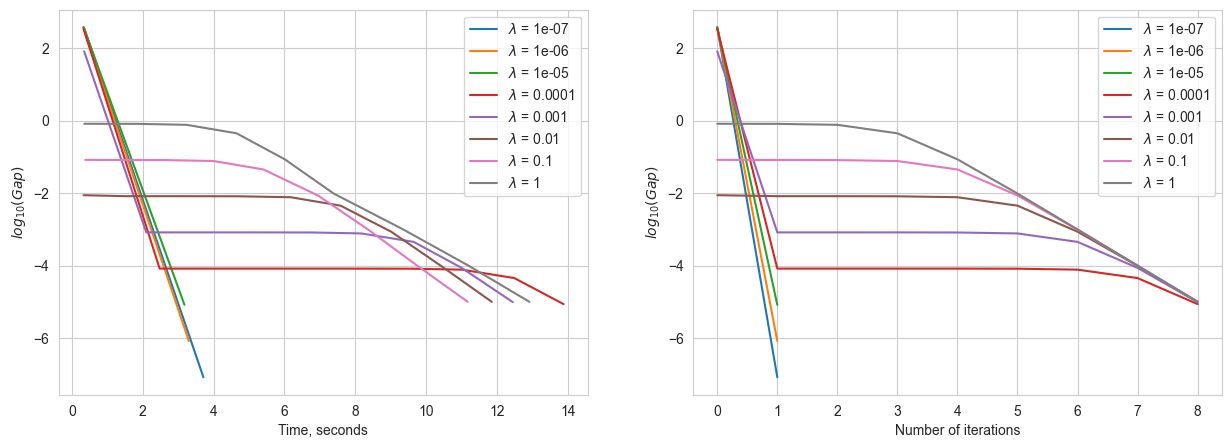

In [88]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i, values in enumerate(result_array_iter):
    gap, time = values
    axis[1].plot(time, np.log10(gap), label=f"$\lambda$ = {reg_coeffs[i]}")
for i, values in enumerate(result_array_time):
    gap, time = values
    axis[0].plot(time, np.log10(gap) , label=f"$\lambda$ = {reg_coeffs[i]}") 
axis[0].legend()
axis[1].legend()
axis[0].set(xlabel="Time, seconds", ylabel="$log_{10}(Gap)$")
axis[1].set(xlabel="Number of iterations", ylabel="$log_{10}(Gap)$")